In [1]:
# import required libraries/dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [2]:
# train path
train_path = train_path = 'C:\\Users\\ASUS\\Downloads\\TuSimple\\tusimple_preprocessed\\test\\'

In [3]:
# create a generator and get the images from the directory
img_generator = keras.preprocessing.image.ImageDataGenerator()
seed = 10
images_set = img_generator.flow_from_directory(
    train_path,
    shuffle=False,
    batch_size=64,
    class_mode='binary',
    target_size=(256, 320)
)

Found 5564 images belonging to 2 classes.


In [4]:
'''
Assign the images in 'images_set' to two seperate arrays:
assign the road images to 'X' and the ground truth masks to 'Y'
'''
num_images = 5564 # gotten from the output of the cell above
num_batches = num_images // 64 + 1

# initialize an empty list to store the images
X = []
Y = []
# loop over the batches and extract the images
for i in range(num_batches):
    batch = next(images_set)
    batch_images = batch[0] # this contains the images
    batch_labels = batch[1] # this contains 0s and 1s
    for ind, lb in enumerate(batch_labels):
        '''
        a label of 0 means the image belongs to ground truth image,
        and a label of 1 means that the image belongs to the ground truth mask
        '''
        if lb == 0:
            X.append(batch_images[ind])
        else:
            Y.append(np.mean(batch_images[ind], axis=2)) # Y shape is (m, 256, 320)
    if i % 10 == 0:
        print(f'Batch {i}')

# convert the lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

Batch 0
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80


In [5]:
# Normalize and reshape the mask set (Y)
Y = (Y >= 100).astype('int').reshape(-1, 256, 320, 1)

In [6]:
Y.min(), Y.max()

(0, 1)

In [7]:
# we get 2000 images for testing and evaluation
X = np.array(X[:2000])
Y = np.array(Y[:2000])

In [8]:
# Split the datset into train and val sets
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=.1, random_state=100)

In [10]:
print("Shape of X_train:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_test.shape)
print("Shape of Y_val:", Y_val.shape)

Shape of X_train: (1800, 256, 320, 3)
Shape of X_val: (200, 256, 320, 3)
Shape of Y_train: (1800, 256, 320, 1)
Shape of Y_val: (200, 256, 320, 1)


In [11]:
# free the RAM from undesired clutters
import gc
del X, Y, images_set
gc.collect()

0

In [12]:
model = tf.keras.models.load_model('C:\\Users\\ASUS\\Desktop\\epochs\\new_model.h5')  # Replace with the path to your trained model
preds = model.predict(X_test[0:100])
preds.max(), preds.min()

4/4 [==============================] - 60s 14s/step


(0.95046157, 0.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


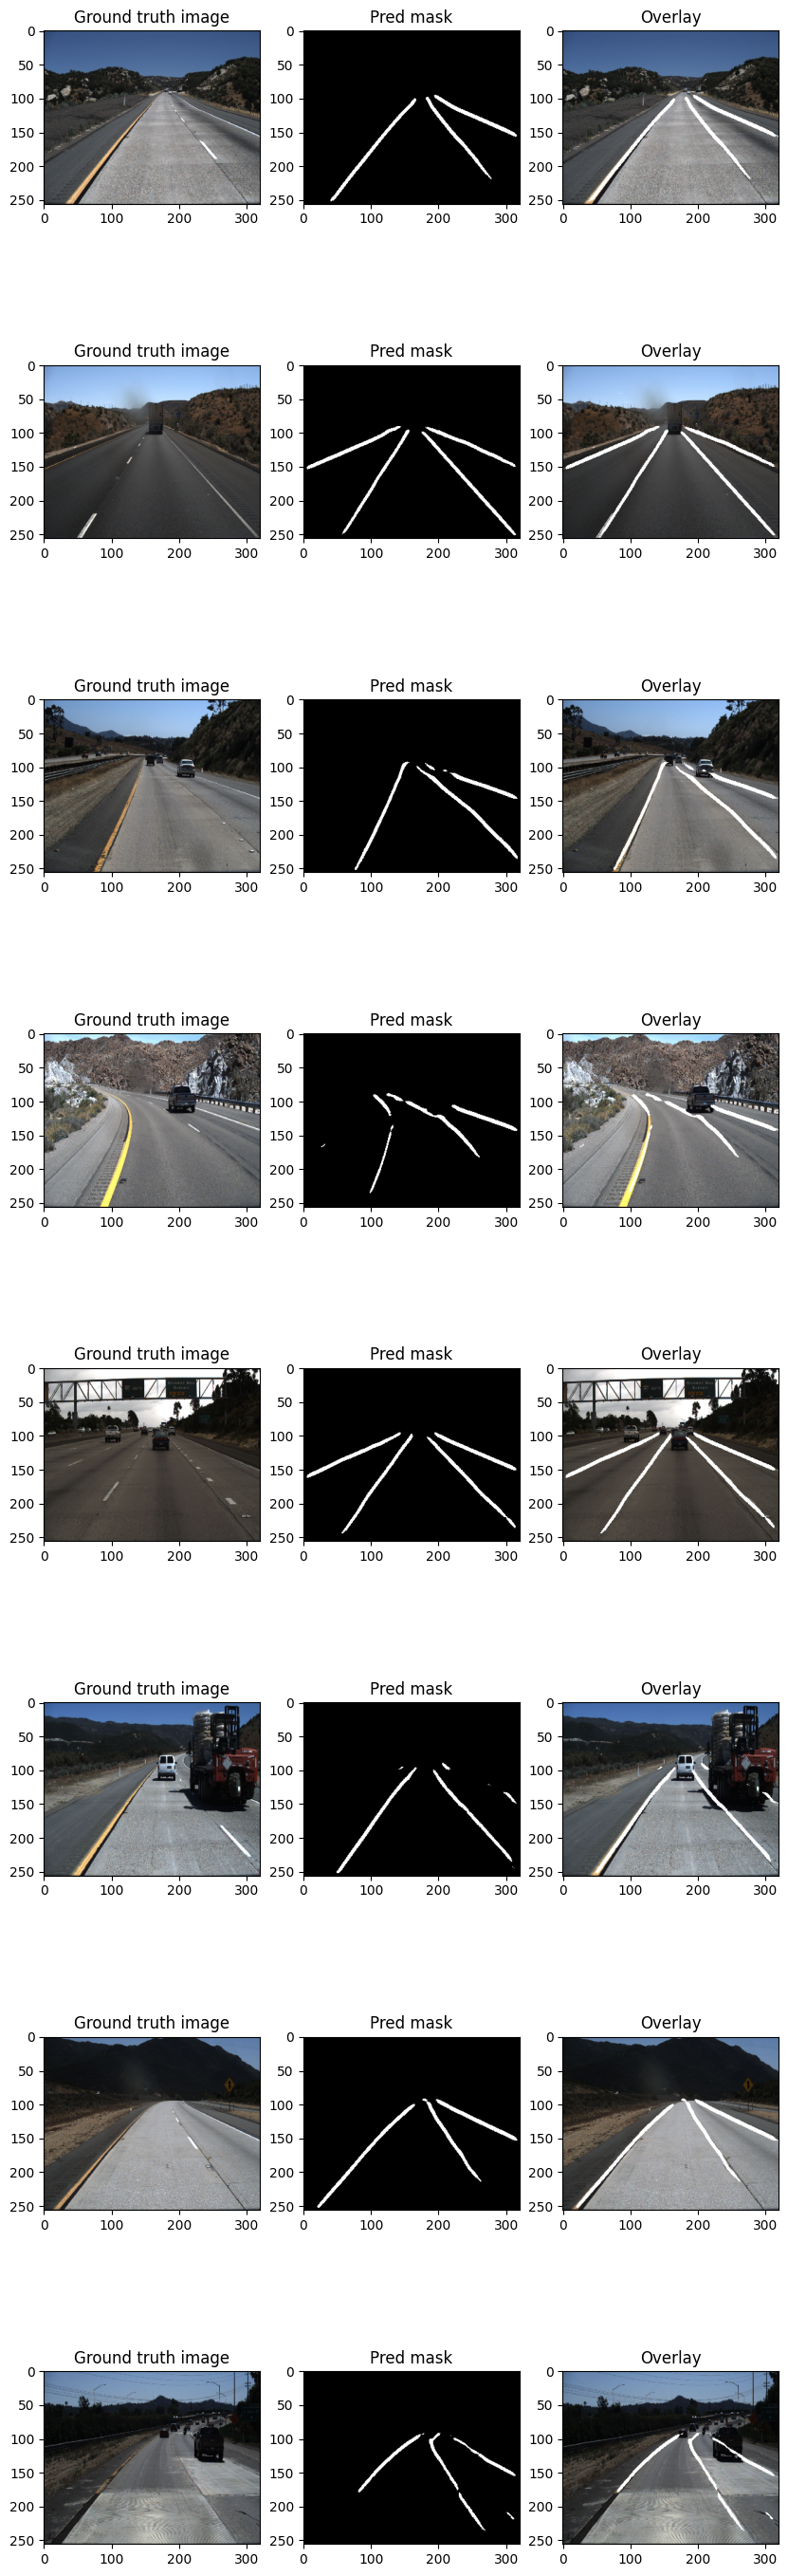

In [16]:
# visualize some results from the validation set.
plt.figure(figsize=(10, 45))
s, e = 90, 98
index = 1

preds = (preds >= .5).astype('int')
for i, j, k in zip(X_test[s:e], preds[s:e], Y_test[s:e]):

    # write these images into file as well
    cv2.imwrite(f'./out/img-{index}.jpg', i)
    cv2.imwrite(f'./out/pred-{index}.jpg', j*255.)
    cv2.imwrite(f'./out/ground-{index}.jpg', k*255.)

    plt.subplot(10, 3, index)
    plt.imshow(i/255)
    plt.title('Ground truth image')

    plt.subplot(10, 3, index+1)
    plt.imshow(j, cmap='gray')
    plt.title('Pred mask')

    plt.subplot(10, 3, index+2)
    plt.imshow(i/255 + j, cmap='gray')
    plt.title('Overlay')
    index += 3

In [231]:
# Load image
image_path = 'C:\\Users\\ASUS\\Desktop\\epochs\\photo_2023-09-21_20-47-21.jpg'  
input_image = cv2.imread(image_path)
input_image = cv2.resize(input_image, (320, 256))  
#input_image = input_image / 255.0  

In [232]:
predics = model.predict(input_image.reshape(1, 256, 320, 3))

1/1 [==============================] - 1s 565ms/step


In [233]:
import numpy as np

# Assuming predics is your NumPy array containing predictions
predics[predics < 0] = 0.0  # Set all values smaller than zero to zero

In [234]:
predics.max(), predics.min()

(0.7410139, 1.198685e-22)

In [235]:
predics = (predics >= 0.5).astype('int')

In [236]:
predics = predics.squeeze()

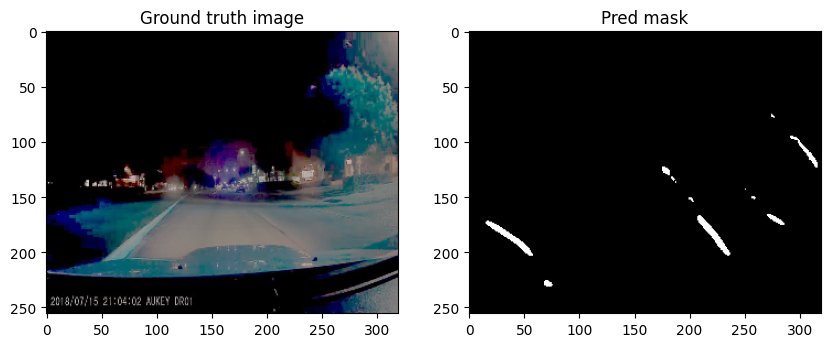

In [237]:
# visualize some results from the validation set.
plt.figure(figsize=(10, 45))

index = 1

plt.subplot(1, 2, index)
plt.imshow(input_image/255)
plt.title('Ground truth image')

plt.subplot(1, 2, index+1)
plt.imshow(predics, cmap='gray')
plt.title('Pred mask')

index += 2

In [238]:
input_image_normalized = input_image / 255.0

# Expand the dimensions of predics to match the number of channels in input_image
expanded_predics = np.expand_dims(predics, axis=-1)

# Overlay the expanded_predics onto the input_image
overlay_image = input_image_normalized + expanded_predics

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


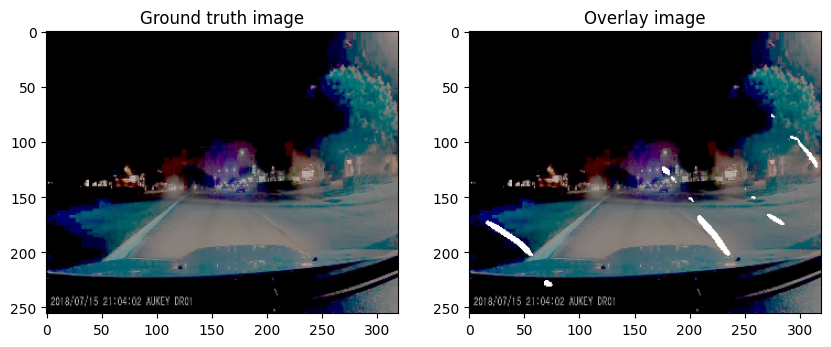

In [239]:
# visualize some results from the validation set.
plt.figure(figsize=(10, 45))

index = 1

plt.subplot(1, 2, index)
plt.imshow(input_image/255)
plt.title('Ground truth image')

plt.subplot(1, 2, index+1)
plt.imshow(overlay_image, cmap='gray')
plt.title('Overlay image')

index += 2

In [240]:
# Assuming overlay_image is the image you want to save
output_path = 'C:\\Users\\ASUS\\Desktop\\epochs\\overlay_image.jpg'
# Save the overlayed image as a JPEG file
overlay_image_uint8 = (overlay_image * 255).astype(np.uint8)
cv2.imwrite(output_path, overlay_image_uint8)

True

In [241]:
# Assuming overlay_image is the image you want to save
overlayed_image = overlay_image  # This should be the overlayed image

# Specify the output path, including the filename and file extension (.jpg)
output_path = 'C:\\Users\\ASUS\\Desktop\\epochs\\overlayed_imagenew.jpg'

# Ensure that overlayed_image is in the correct format (0-255 range, uint8)
overlayed_image_uint8 = (overlayed_image * 255).clip(0, 255).astype(np.uint8)

# Save the overlayed image as a JPEG file
cv2.imwrite(output_path, overlayed_image_uint8)

#print(f'Saved overlayed image to: {output_path}')


True